Pytorch Implementation

In [25]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
style.use('dark_background')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%cd /content/drive/MyDrive/Colab Notebooks/Sem 2 - Advance Deeplearning

/content/drive/MyDrive/Colab Notebooks/Sem 2 - Advance Deeplearning


In [13]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sem 2 - Advance Deeplearning/Ecommerce_Customers_Kaggle.csv")

In [14]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [33]:
X = data.iloc[:,3:-1].values

In [34]:
X

array([[34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       ...,
       [32.64677668, 11.49940906, 38.33257633,  4.95826447],
       [33.32250105, 12.39142299, 36.84008573,  2.33648467],
       [33.71598092, 12.41880832, 35.77101619,  2.73515957]])

In [35]:
y = data.iloc[:,-1].values

In [36]:
y = y.reshape(-1,1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
X_test.shape

(100, 4)

In [39]:
X_train.shape

(400, 4)

In [40]:
y_train.shape

(400, 1)

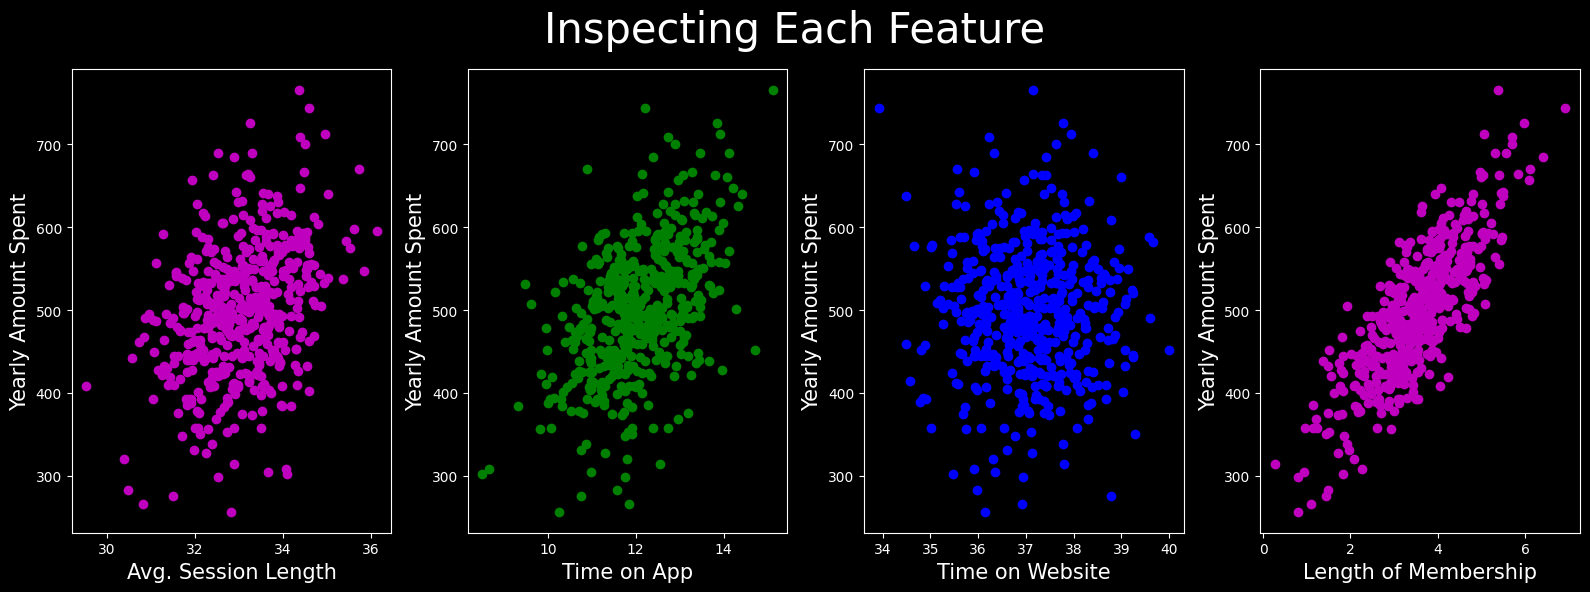

In [41]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(16,6))
plt.suptitle('Inspecting Each Feature', fontsize = 30)
axes[0].plot(data['Avg. Session Length'],data['Yearly Amount Spent'],'mo')
axes[0].set_ylabel("Yearly Amount Spent", fontsize = 15)
axes[0].set_xlabel("Avg. Session Length", fontsize = 15)
axes[1].plot(data['Time on App'],data['Yearly Amount Spent'],'go')
axes[1].set_ylabel("Yearly Amount Spent", fontsize = 15)
axes[1].set_xlabel("Time on App", fontsize = 15)
axes[2].plot(data['Time on Website'],data['Yearly Amount Spent'],'bo')
axes[2].set_ylabel("Yearly Amount Spent", fontsize = 15)
axes[2].set_xlabel("Time on Website", fontsize = 15)
axes[3].plot(data['Length of Membership'],data['Yearly Amount Spent'],'mo')
axes[3].set_ylabel("Yearly Amount Spent", fontsize = 15)
axes[3].set_xlabel("Length of Membership", fontsize = 15)
plt.tight_layout();

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [56]:
model = nn.Sequential(
 nn.Linear(4,1),
)
model

Sequential(
  (0): Linear(in_features=4, out_features=1, bias=True)
)

In [57]:
learningRate = 0.01
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learningRate)

In [58]:
epochs = 1200
losses = torch.zeros(epochs)

for epoch in range(epochs):
    ypred = model(X_train)
    loss = lossfunc(ypred,y_train)
    losses[epoch] = loss

    if (epoch % 100) == 0:
     print(f'epochs : {epoch} loss : {loss.detach(): 1.2f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs : 0 loss :  258709.98
epochs : 100 loss :  4623.40
epochs : 200 loss :  175.16
epochs : 300 loss :  97.21
epochs : 400 loss :  95.85
epochs : 500 loss :  95.82
epochs : 600 loss :  95.82
epochs : 700 loss :  95.82
epochs : 800 loss :  95.82
epochs : 900 loss :  95.82
epochs : 1000 loss :  95.82
epochs : 1100 loss :  95.82


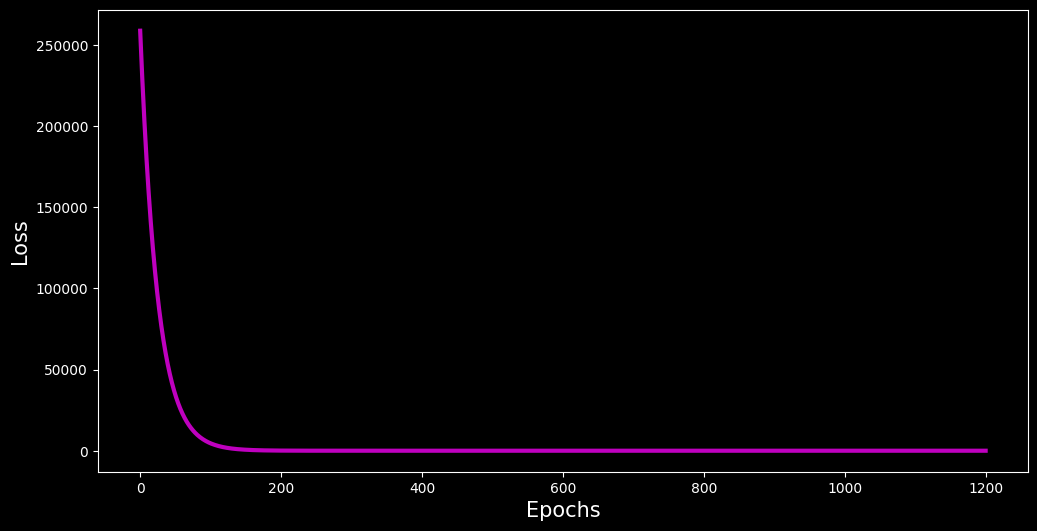

In [59]:
plt.figure(figsize =(12,6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw = 3)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

In [60]:
y_pred = model(X_test)

In [61]:
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()

In [62]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 10.481527
MAE: 2.925469
R2: 0.9778133286082378


TENSOR FLOW CODE

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')


In [64]:
X1 = data.iloc[:,3:-1].values

In [65]:
y1 = data.iloc[:,-1].values

In [66]:
X1

array([[34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       ...,
       [32.64677668, 11.49940906, 38.33257633,  4.95826447],
       [33.32250105, 12.39142299, 36.84008573,  2.33648467],
       [33.71598092, 12.41880832, 35.77101619,  2.73515957]])

In [68]:
y1 = y.reshape(-1,1)

In [69]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [70]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X1_train = sc1.fit_transform(X1_train)
X1_test = sc1.transform(X1_test)

In [71]:
model_tf = Sequential()
model_tf.add(Dense(units = 1, input_shape =(4,), activation = None))

In [72]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model_tf.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) ,loss='mse')

In [74]:
history = model_tf.fit(X1_train,y1_train, epochs = 1200)

Epoch 1/1200
13/13 [==============================] - 1s 3ms/step - loss: 207413.9062
Epoch 2/1200
13/13 [==============================] - 0s 6ms/step - loss: 122504.5391
Epoch 3/1200
13/13 [==============================] - 0s 3ms/step - loss: 72409.1719
Epoch 4/1200
13/13 [==============================] - 0s 3ms/step - loss: 42939.0508
Epoch 5/1200
13/13 [==============================] - 0s 3ms/step - loss: 25411.3672
Epoch 6/1200
13/13 [==============================] - 0s 3ms/step - loss: 15069.0947
Epoch 7/1200
13/13 [==============================] - 0s 3ms/step - loss: 8941.9502
Epoch 8/1200
13/13 [==============================] - 0s 3ms/step - loss: 5297.4395
Epoch 9/1200
13/13 [==============================] - 0s 4ms/step - loss: 3170.7664
Epoch 10/1200
13/13 [==============================] - 0s 4ms/step - loss: 1916.3442
Epoch 11/1200
13/13 [==============================] - 0s 3ms/step - loss: 1173.3295
Epoch 12/1200
13/13 [==============================] - 0s 3ms/step

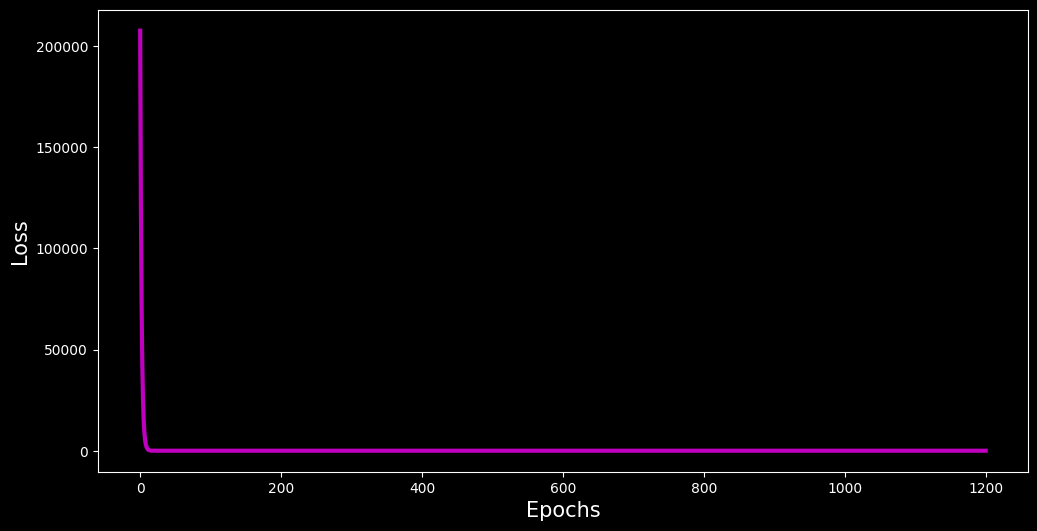

In [75]:
plt.figure(figsize =(12,6))
plt.plot(history.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

In [76]:
print("Weights are :" )
print(model_tf.layers[0].get_weights()[0])
print(" ")
print("Bias is :" )
print(model_tf.layers[0].get_weights()[1])

Weights are :
[[25.284454 ]
 [38.682148 ]
 [ 0.2823363]
 [63.53983  ]]
 
Bias is :
[502.03452]


In [77]:
y1_pred = model_tf.predict(X1_test)


4/4 [==============================] - 0s 5ms/step


In [78]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y1_test, y1_pred)))
print('R2:', metrics.r2_score(y1_test, y1_pred))

RMSE: 10.483428950675272
MAE: 2.9255968867660957
R2: 0.977805279502681
